In [0]:

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2


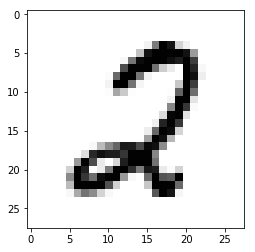

In [19]:
import matplotlib.pyplot as plt
image_index = 7787 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [20]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
input_shape = (28, 28, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [25]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
#Building a model 😊

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0620 06:07:13.133059 139662555146112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 06:07:13.158410 139662555146112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0620 06:07:13.242656 139662555146112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.2038 - acc: 0.9389
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0807 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0572 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0420 - acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0351 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0278 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0230 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0216 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0179 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0175 - a

In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 48us/step


[0.07187616123383778, 0.983]

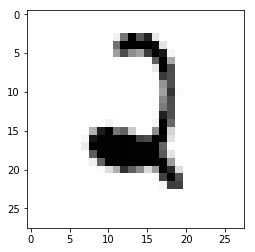

In [37]:
image_index = 4445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [38]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

2
